In [1]:
%pip install folium

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import folium
from folium.plugins import HeatMap
from matplotlib import font_manager, rc
import platform

#시스템이 window라면 폰트를 '맑은 고딕'으로 설정
if platform.system() == "Windows":
    rc('font', family='Malgun Gothic')
elif platform.system() == "Darwin":  # macOS
    rc('font', family='AppleGothic')
else:  # Linux
    rc('font', family='DejaVu Sans')

plt.rcParams['axes.unicode_minus'] = False  # 음수 부호 설정


# 파일 경로 설정 (Raw 문자열 사용)
file_path_2023 = r'./data/(한강)수난사고 구조출동 현황 2023.csv'
file_path_2022 = r'./data/(한강)수난사고 구조출동 현황 2022.csv'

# CSV 파일 불러오기
data_2023 = pd.read_csv(file_path_2023, encoding='utf-8')
data_2022 = pd.read_csv(file_path_2022, encoding='utf-8')

In [5]:
# 안쓰는 컬럼 제거 
data_2023 = data_2023.drop([
    'acdnt_cause',
    'prcs_result_se_nm',
    'dclr_ymd',
    'dclr_tm',
    'dclr_yr',
    'qtr_se',
    'dclr_mnth',
    'dclr_day',
    'dclr_hour',
    'dclr_min',
    'spt_arvl_yr',
    'resc_cmptn_yr',
    'hmg_ymd',
    'hmg_tm',
    'hmg_yr',
    'hmg_mnth',
    'hmg_day',
    'hmg_hour',
    'hmg_min',
    'cty_frmvl_se_nm',
    'emd_se_nm',
    'acdnt_place_nm',
    'acdnt_place_detail_nm',
    'frstt_nm',
    'ward_nm',
    'lfdau_nm'
], axis=1)


In [6]:
data_2022=data_2022.drop([
    'acdnt_cause',
    'prcs_result_se_nm',
    'dclr_ymd',
    'dclr_tm',
    'dclr_yr',
    'qtr_se',
    'dclr_mnth',
    'dclr_day',
    'dclr_hour',
    'dclr_min',
    'spt_arvl_yr',
    'resc_cmptn_yr',
    'hmg_ymd',
    'hmg_tm',
    'hmg_yr',
    'hmg_mnth',
    'hmg_day',
    'hmg_hour',
    'hmg_min',
    'cty_frmvl_se_nm',
    'emd_se_nm',
    'acdnt_place_nm',
    'acdnt_place_detail_nm',
    'frstt_nm',
    'ward_nm',
    'lfdau_nm'
],axis=1)

In [7]:
# 2023 결측치 있는 행 삭제
data_2023=data_2023.dropna(subset=[
    'dsp_ymd','dsp_tm','dsp_yr', 'dsp_mnth', 'dsp_day','dsp_hour','dsp_min', #출동일자
    'spt_arvl_ymd', # 현장도착일자 (같은 행의 변수들은 생략)
    'resc_cmptn_ymd', # 구조완료 일자
    'spt_frstt_dist', # 현장소방서거리
    'time_unit_tmprt', #시간단위기온
    'time_unit_ws', # 시간단위풍속
    'time_unit_wd', # 시간단위풍향
    'time_unit_humidity', #시간단위습도
    'time_unit', #시간단위가시거리
])

In [8]:
# 2023 강수량 및 적설량 NULL 값 0으로 대체
# 'time_unit_rainqty'와 'time_unit_msnf'의 결측치를 0으로 대체
data_2023.loc[:, 'time_unit_rainqty'] = data_2023['time_unit_rainqty'].fillna(0)
data_2023.loc[:, 'time_unit_msnf'] = data_2023['time_unit_msnf'].fillna(0)

In [9]:
# 2022 결측치 있는 행 삭제
data_2022=data_2022.dropna(subset=[
    'dsp_ymd','dsp_tm','dsp_yr', 'dsp_mnth', 'dsp_day','dsp_hour','dsp_min', #출동일자
    'spt_arvl_ymd', # 현장도착일자 (같은 행의 변수들은 생략)
    'resc_cmptn_ymd', # 구조완료 일자
    'gis_x_axis','gis_y_axis', ################ gis x,y 좌표
    'spt_frstt_dist', # 현장소방서거리
])

In [10]:
# 2022 강수량 및 적설량 NULL 값 0으로 대체
# 'time_unit_rainqty'와 'time_unit_msnf'의 결측치를 0으로 대체
data_2022.loc[:, 'time_unit_rainqty'] = data_2022['time_unit_rainqty'].fillna(0)
data_2022.loc[:, 'time_unit_msnf'] = data_2022['time_unit_msnf'].fillna(0)

In [11]:
data=pd.concat([data_2023,data_2022])

In [12]:
data

,msfrtn_resc_reprt_no,season_se_nm,daywk,dsp_ymd,dsp_tm,dsp_yr,dsp_mnth,dsp_day,dsp_hour,dsp_min,...,gis_y_axis,spt_frstt_dist,acdnt_cause_asort_nm,time_unit_tmprt,time_unit_rainqty,time_unit_ws,time_unit_wd,time_unit_humidity,time_unit_msnf,time_unit
0,20231126307R00001,겨울,일요일,20230101.0,11100.0,2023.0,1.0,1.0,1.0,11.0,...,552416.6000,0.0,기타 수난,1.5,0.0,2.0,250.0,71.0,0.0,1104.0
1,20231113201R00001,겨울,일요일,20230101.0,12600.0,2023.0,1.0,1.0,1.0,26.0,...,549753.4163,2.2,기타 수난,1.5,0.0,2.0,250.0,71.0,0.0,1104.0
2,20231108201R00001,겨울,일요일,20230101.0,24400.0,2023.0,1.0,1.0,2.0,44.0,...,547664.6300,3.0,수색,1.5,0.0,2.0,250.0,72.0,0.0,925.0
3,20231106105R00001,겨울,일요일,20230101.0,65000.0,2023.0,1.0,1.0,6.0,50.0,...,545143.3199,2.1,수색,-0.2,0.0,3.0,320.0,67.0,0.0,962.0
4,20231126305R00001,겨울,일요일,20230101.0,65000.0,2023.0,1.0,1.0,6.0,50.0,...,545143.3199,0.2,기타 수난,-0.2,0.0,3.0,320.0,67.0,0.0,962.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6509,20221126304R00742,겨울,토요일,20221231.0,183600.0,2022.0,12.0,31.0,18.0,36.0,...,547454.2799,0.7,기타 수난,0.6,0.0,2.2,20.0,68.0,0.0,1286.0
6510,20221119108R01087,겨울,토요일,20221231.0,184700.0,2022.0,12.0,31.0,18.0,47.0,...,541002.1779,1.8,침수,0.6,0.0,2.2,20.0,68.0,0.0,1286.0
6511,20221108201R01819,겨울,토요일,20221231.0,232000.0,2022.0,12.0,31.0,23.0,20.0,...,549932.1177,3.6,수색,-0.2,0.0,1.3,230.0,77.0,0.0,1314.0
6512,20221113106R00702,겨울,토요일,20221231.0,232000.0,2022.0,12.0,31.0,23.0,20.0,...,549932.1177,2.7,기타 수난,-0.2,0.0,1.3,230.0,77.0,0.0,1314.0


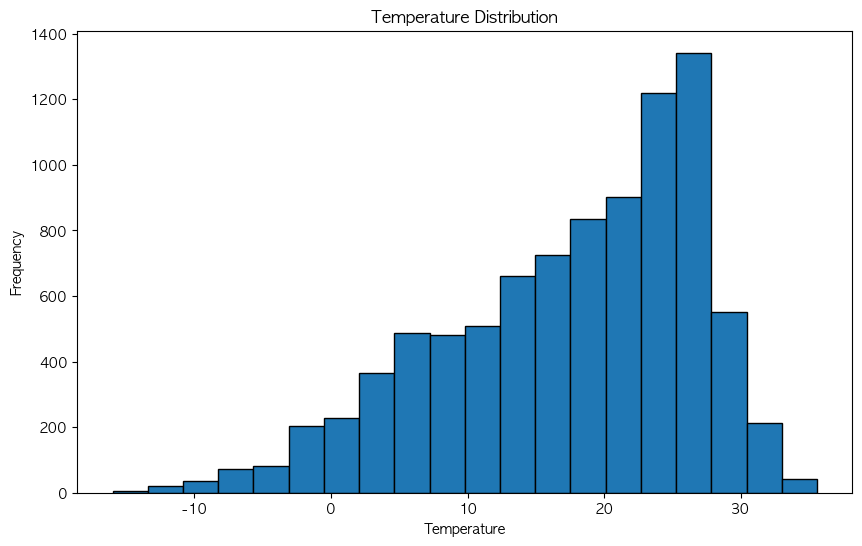

In [13]:
# 기온에 대한 시각화
plt.figure(figsize=(10, 6))
plt.hist(data['time_unit_tmprt'], bins=20, edgecolor='k')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

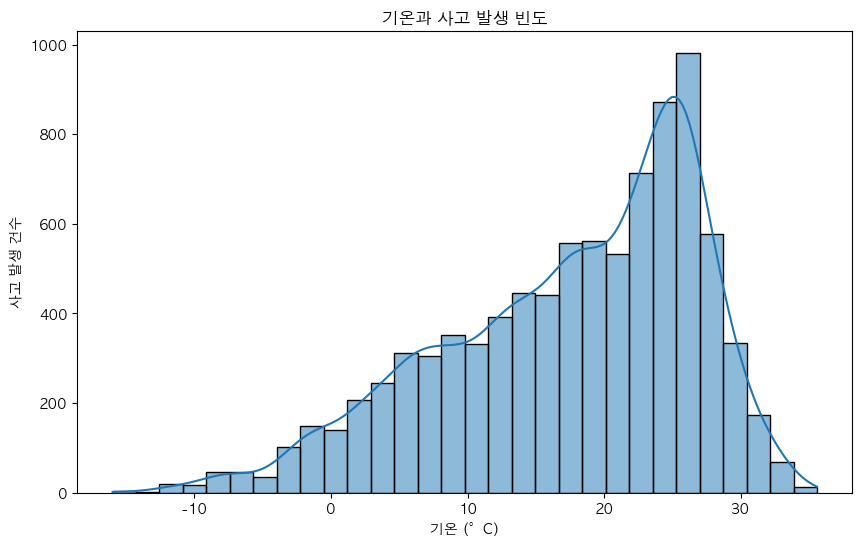

In [14]:
# 기온과 사고 발생 빈도
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='time_unit_tmprt', kde=True, bins=30)
plt.title('기온과 사고 발생 빈도')
plt.xlabel('기온 (°C)')
plt.ylabel('사고 발생 건수')
plt.show()

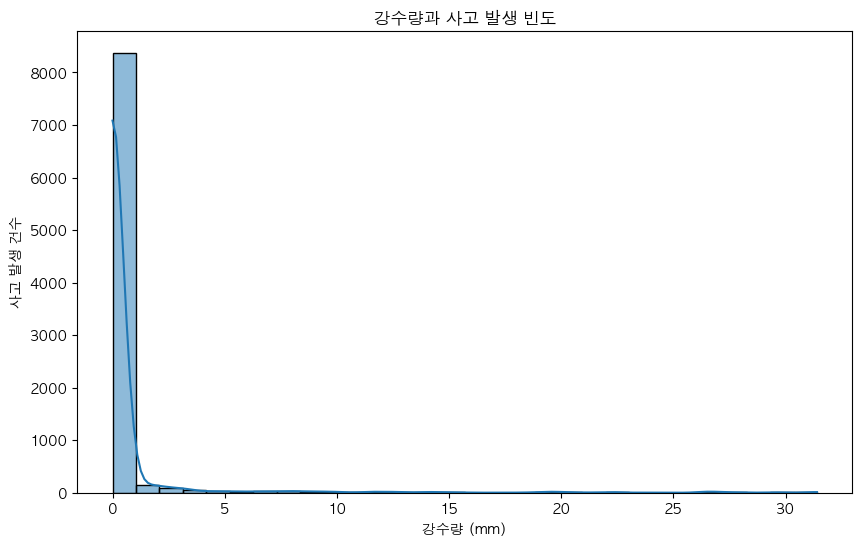

In [15]:
# 강수량과 사고 발생 빈도
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='time_unit_rainqty', kde=True, bins=30)
plt.title('강수량과 사고 발생 빈도')
plt.xlabel('강수량 (mm)')
plt.ylabel('사고 발생 건수')
plt.show()

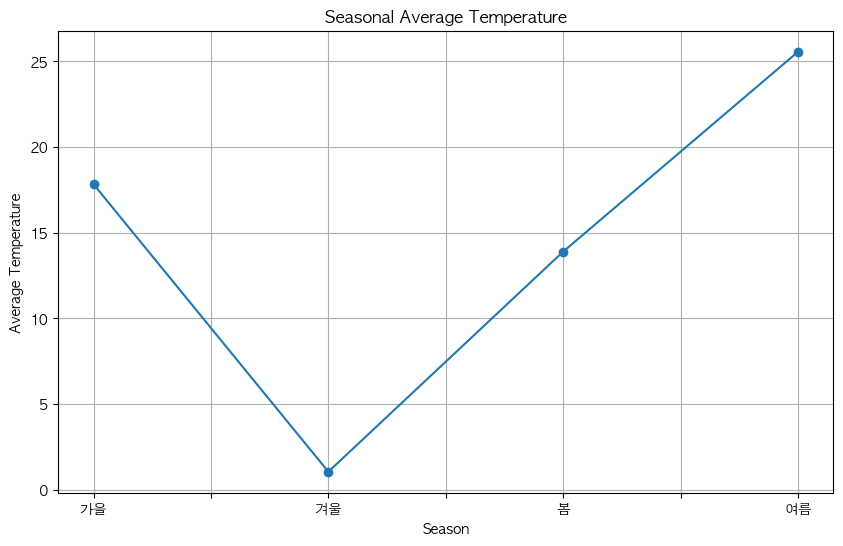

In [16]:
# 3. Seasonal temperature trends
season_temp = data.groupby('season_se_nm')['time_unit_tmprt'].mean()

plt.figure(figsize=(10, 6))
season_temp.plot(kind='line', marker='o')
plt.title('Seasonal Average Temperature')
plt.xlabel('Season')
plt.ylabel('Average Temperature')
plt.grid(True)
plt.show()

In [17]:
# 'time_unit_tmprt', 'time_unit_rainqty', 'time_unit_ws', 'time_unit_humidity' 통해 기상 조건에 따른 사고 분석
# 각 기상 조건별로 사고 발생 상황을 평균값으로 분석

# 필요한 열 추출
weather_conditions = data[['acdnt_cause_asort_nm', 'time_unit_tmprt', 'time_unit_rainqty', 'time_unit_ws', 'time_unit_humidity']]

# 각 기상 조건에 따른 사고 원인의 평균 기상 조건 확인
weather_avg_by_cause = weather_conditions.groupby('acdnt_cause_asort_nm').mean()

# 원인에 대한 평균 기상 조건 확인 # 기상 조건에 따른 사고 원인별 평균 기상 분석 결과
weather_avg_by_cause


,time_unit_tmprt,time_unit_rainqty,time_unit_ws,time_unit_humidity
acdnt_cause_asort_nm,,,,
고립,22.109346,2.519626,2.963551,71.626168
기타 수난,16.812977,0.263077,2.248725,67.427004
사체인양,20.375000,0.061628,2.265698,65.151163
수색,17.047319,0.107996,2.382502,65.586077
익수,19.810536,0.416250,2.441786,68.291071
침몰,21.144444,1.950000,2.800000,71.203704
침수,21.915064,4.961343,2.554809,86.116152


In [18]:
# 'season_se_nm' 열을 통해 계절별 수난사고 발생 빈도 분석
season_accident_frequency = data['season_se_nm'].value_counts()

# 계절의 빈도 확인
season_accident_frequency

season_se_nm
여름    3180
봄     2748
가을    2050
겨울    1002
Name: count, dtype: int64

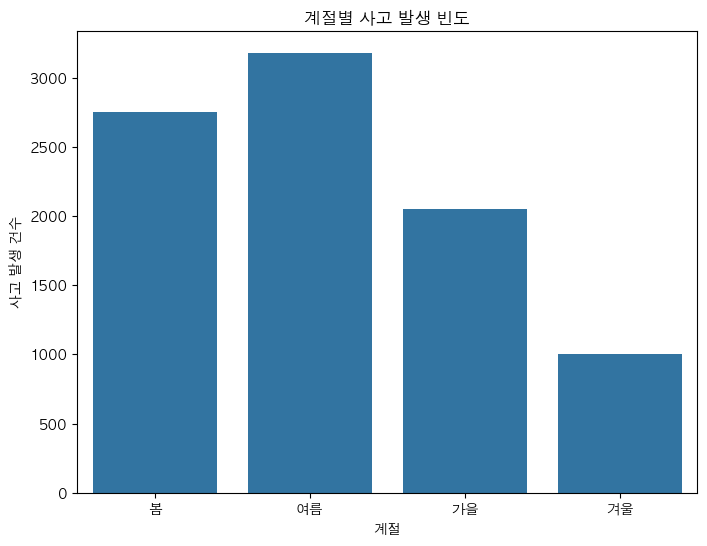

In [19]:
# 계절별 사고 발생 빈도 시각화
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='season_se_nm', order=['봄', '여름', '가을', '겨울'])
plt.title('계절별 사고 발생 빈도')
plt.xlabel('계절')
plt.ylabel('사고 발생 건수')
plt.show()

In [20]:
# 'season_se_nm', 'time_unit_tmprt', 'time_unit_rainqty', 'time_unit_ws', 'time_unit_humidity'  이용해 
# 계절별 기상 조건과 사고 비교

# 계절별로 평균 기상 조건을 확인하여 사고와 기상 조건 간의 관계 분석

# 필요한 열 추출
season_weather_conditions = data[['season_se_nm', 'time_unit_tmprt', 'time_unit_rainqty', 'time_unit_ws', 'time_unit_humidity']]

# 각 계절별 평균 기상 조건 확인
season_weather_avg = season_weather_conditions.groupby('season_se_nm').mean()

# 계절별 평균 기상 조건
season_weather_avg

,time_unit_tmprt,time_unit_rainqty,time_unit_ws,time_unit_humidity
season_se_nm,,,,
가을,17.835902,0.323317,2.283951,67.869268
겨울,1.055689,0.027844,2.240519,62.001996
봄,13.902038,0.048836,2.394032,58.113173
여름,25.568742,1.366384,2.269119,79.757233


In [21]:
# 'daywk' 열을 통해 요일별 수난사고 발생 빈도 분석
weekday_accident_frequency = data['daywk'].value_counts().sort_index()

# 요일별 수난사고 발생 빈도 확인
weekday_accident_frequency

daywk
금요일    1036
목요일    1171
수요일    1225
월요일    1453
일요일    1468
토요일    1214
화요일    1413
Name: count, dtype: int64

In [22]:
# 'time_unit_tmprt', 'time_unit_rainqty', 'time_unit_ws', 'time_unit_humidity' 등을 통해 기상 조건별 사고 빈도 분석
# 기온, 강수량, 풍속, 습도에 따른 사고 발생 빈도를 구간화하여 분석

# 필요한 열 추출
weather_conditions_for_analysis = data[['time_unit_tmprt', 'time_unit_rainqty', 'time_unit_ws', 'time_unit_humidity']].dropna()

# 기온, 강수량, 풍속, 습도에 따른 사고 빈도 구간화
temp_bins = pd.cut(weather_conditions_for_analysis['time_unit_tmprt'], bins=[-10, 0, 10, 20, 30, 40], labels=["<0°C", "0-10°C", "10-20°C", "20-30°C", ">30°C"])
rain_bins = pd.cut(weather_conditions_for_analysis['time_unit_rainqty'], bins=[0, 1, 5, 10, 50, 100], labels=["0-1mm", "1-5mm", "5-10mm", "10-50mm", ">50mm"])
ws_bins = pd.cut(weather_conditions_for_analysis['time_unit_ws'], bins=[0, 2, 4, 6, 8, 10], labels=["0-2m/s", "2-4m/s", "4-6m/s", "6-8m/s", ">8m/s"])
humidity_bins = pd.cut(weather_conditions_for_analysis['time_unit_humidity'], bins=[0, 20, 40, 60, 80, 100], labels=["0-20%", "20-40%", "40-60%", "60-80%", "80-100%"])

# 각 기상 조건별 사고 빈도 계산
weather_conditions_for_analysis['temp_range'] = temp_bins
weather_conditions_for_analysis['rain_range'] = rain_bins
weather_conditions_for_analysis['wind_speed_range'] = ws_bins
weather_conditions_for_analysis['humidity_range'] = humidity_bins

# 기온, 강수량, 풍속, 습도 구간별 사고 빈도 계산
temp_accident_frequency = weather_conditions_for_analysis['temp_range'].value_counts().sort_index()
rain_accident_frequency = weather_conditions_for_analysis['rain_range'].value_counts().sort_index()
ws_accident_frequency = weather_conditions_for_analysis['wind_speed_range'].value_counts().sort_index()
humidity_accident_frequency = weather_conditions_for_analysis['humidity_range'].value_counts().sort_index()

In [23]:
temp_accident_frequency

temp_range
<0°C        443
0-10°C     1560
10-20°C    2660
20-30°C    3989
>30°C       300
Name: count, dtype: int64

In [24]:
rain_accident_frequency

rain_range
0-1mm      407
1-5mm      318
5-10mm     120
10-50mm    166
>50mm        0
Name: count, dtype: int64

In [25]:
ws_accident_frequency

wind_speed_range
0-2m/s    4410
2-4m/s    3961
4-6m/s     458
6-8m/s      42
>8m/s        2
Name: count, dtype: int64

In [26]:
humidity_accident_frequency

humidity_range
0-20%        31
20-40%      824
40-60%     2057
60-80%     3341
80-100%    2727
Name: count, dtype: int64

In [27]:
sigungu_nm = data[['sigungu_nm']].value_counts()
sigungu_nm_df = sigungu_nm.reset_index()
sigungu_nm_df

,sigungu_nm,count
0,마포구,1789
1,영등포구,1547
2,송파구,1000
3,용산구,919
4,서초구,692
5,강남구,555
6,광진구,529
7,강동구,525
8,동작구,505
9,성동구,265


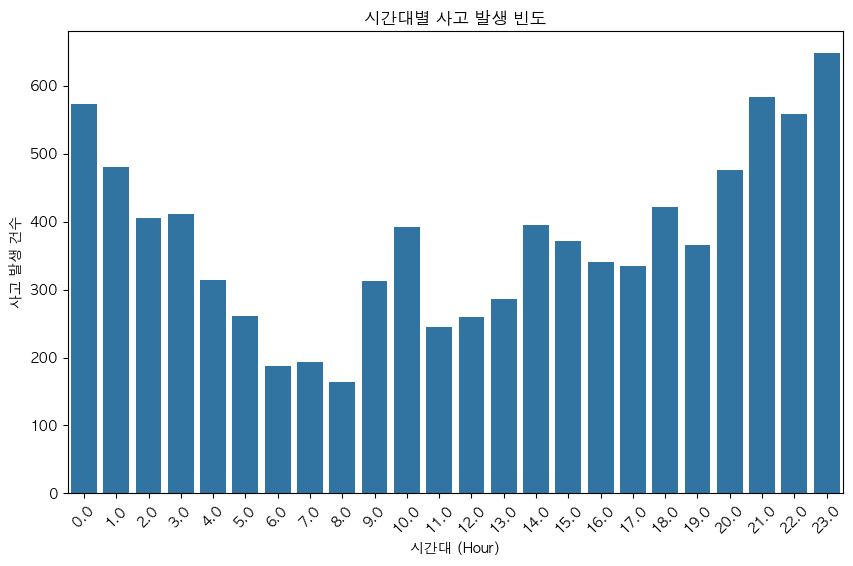

In [28]:
# 시간대별 사고 발생 빈도 시각화
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='dsp_hour', order=sorted(data['dsp_hour'].unique()))
plt.title('시간대별 사고 발생 빈도')
plt.xlabel('시간대 (Hour)')
plt.ylabel('사고 발생 건수')
plt.xticks(rotation=45)
plt.show()

In [29]:
data

,msfrtn_resc_reprt_no,season_se_nm,daywk,dsp_ymd,dsp_tm,dsp_yr,dsp_mnth,dsp_day,dsp_hour,dsp_min,...,gis_y_axis,spt_frstt_dist,acdnt_cause_asort_nm,time_unit_tmprt,time_unit_rainqty,time_unit_ws,time_unit_wd,time_unit_humidity,time_unit_msnf,time_unit
0,20231126307R00001,겨울,일요일,20230101.0,11100.0,2023.0,1.0,1.0,1.0,11.0,...,552416.6000,0.0,기타 수난,1.5,0.0,2.0,250.0,71.0,0.0,1104.0
1,20231113201R00001,겨울,일요일,20230101.0,12600.0,2023.0,1.0,1.0,1.0,26.0,...,549753.4163,2.2,기타 수난,1.5,0.0,2.0,250.0,71.0,0.0,1104.0
2,20231108201R00001,겨울,일요일,20230101.0,24400.0,2023.0,1.0,1.0,2.0,44.0,...,547664.6300,3.0,수색,1.5,0.0,2.0,250.0,72.0,0.0,925.0
3,20231106105R00001,겨울,일요일,20230101.0,65000.0,2023.0,1.0,1.0,6.0,50.0,...,545143.3199,2.1,수색,-0.2,0.0,3.0,320.0,67.0,0.0,962.0
4,20231126305R00001,겨울,일요일,20230101.0,65000.0,2023.0,1.0,1.0,6.0,50.0,...,545143.3199,0.2,기타 수난,-0.2,0.0,3.0,320.0,67.0,0.0,962.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6509,20221126304R00742,겨울,토요일,20221231.0,183600.0,2022.0,12.0,31.0,18.0,36.0,...,547454.2799,0.7,기타 수난,0.6,0.0,2.2,20.0,68.0,0.0,1286.0
6510,20221119108R01087,겨울,토요일,20221231.0,184700.0,2022.0,12.0,31.0,18.0,47.0,...,541002.1779,1.8,침수,0.6,0.0,2.2,20.0,68.0,0.0,1286.0
6511,20221108201R01819,겨울,토요일,20221231.0,232000.0,2022.0,12.0,31.0,23.0,20.0,...,549932.1177,3.6,수색,-0.2,0.0,1.3,230.0,77.0,0.0,1314.0
6512,20221113106R00702,겨울,토요일,20221231.0,232000.0,2022.0,12.0,31.0,23.0,20.0,...,549932.1177,2.7,기타 수난,-0.2,0.0,1.3,230.0,77.0,0.0,1314.0


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8980 entries, 0 to 6513
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   msfrtn_resc_reprt_no  8980 non-null   object 
 1   season_se_nm          8980 non-null   object 
 2   daywk                 8980 non-null   object 
 3   dsp_ymd               8980 non-null   float64
 4   dsp_tm                8980 non-null   float64
 5   dsp_yr                8980 non-null   float64
 6   dsp_mnth              8980 non-null   float64
 7   dsp_day               8980 non-null   float64
 8   dsp_hour              8980 non-null   float64
 9   dsp_min               8980 non-null   float64
 10  spt_arvl_ymd          8980 non-null   float64
 11  spt_arvl_tm           8980 non-null   float64
 12  spt_arvl_mnth         8980 non-null   float64
 13  spt_arvl_day          8980 non-null   float64
 14  spt_arvl_hour         8980 non-null   float64
 15  spt_arvl_min          8980

In [31]:
#시간 데이터를 다루기 위한 임의의 데이터프레임 생성
df = pd.DataFrame(data)
tmdata = ['dsp_yr', 'dsp_mnth', 'dsp_day','dsp_hour','dsp_min', 'spt_arvl_mnth','spt_arvl_day', 'spt_arvl_hour','spt_arvl_min',
          'resc_cmptn_mnth', 'resc_cmptn_day','resc_cmptn_hour', 'resc_cmptn_min']
tmdata = df[tmdata]

In [32]:
#데이터 타입을 'int'로 변경
tmdata['dsp_yr'] = tmdata['dsp_yr'].astype(int)
tmdata['dsp_mnth'] = tmdata['dsp_mnth'].astype(int)
tmdata['dsp_day'] = tmdata['dsp_day'].astype(int)
tmdata['dsp_hour'] = tmdata['dsp_hour'].astype(int)
tmdata['dsp_min'] = tmdata['dsp_min'].astype(int)
tmdata['spt_arvl_mnth'] = tmdata['spt_arvl_mnth'].astype(int)
tmdata['spt_arvl_day'] = tmdata['spt_arvl_day'].astype(int)
tmdata['spt_arvl_hour'] = tmdata['spt_arvl_hour'].astype(int)
tmdata['spt_arvl_min'] = tmdata['spt_arvl_min'].astype(int)
tmdata['resc_cmptn_mnth'] = tmdata['resc_cmptn_mnth'].astype(int)
tmdata['resc_cmptn_day'] = tmdata['resc_cmptn_day'].astype(int)
tmdata['resc_cmptn_hour'] = tmdata['resc_cmptn_hour'].astype(int)
tmdata['resc_cmptn_min'] = tmdata['resc_cmptn_min'].astype(int)

/var/folders/tx/ky9fr4hj6bs_8gbgd58q9ty00000gn/T/ipykernel_3808/1368547942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmdata['dsp_yr'] = tmdata['dsp_yr'].astype(int)
/var/folders/tx/ky9fr4hj6bs_8gbgd58q9ty00000gn/T/ipykernel_3808/1368547942.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmdata['dsp_mnth'] = tmdata['dsp_mnth'].astype(int)
/var/folders/tx/ky9fr4hj6bs_8gbgd58q9ty00000gn/T/ipykernel_3808/1368547942.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [33]:
#데이터타입 변경 확인
tmdata

,dsp_yr,dsp_mnth,dsp_day,dsp_hour,dsp_min,spt_arvl_mnth,spt_arvl_day,spt_arvl_hour,spt_arvl_min,resc_cmptn_mnth,resc_cmptn_day,resc_cmptn_hour,resc_cmptn_min
0,2023,1,1,1,11,1,1,1,11,1,1,1,11
1,2023,1,1,1,26,1,1,1,30,1,1,2,5
2,2023,1,1,2,44,1,1,2,50,1,1,2,58
3,2023,1,1,6,50,1,1,6,56,1,1,7,9
4,2023,1,1,6,50,1,1,6,51,1,1,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6509,2022,12,31,18,36,12,31,18,40,12,31,18,46
6510,2022,12,31,18,47,12,31,19,0,12,31,19,15
6511,2022,12,31,23,20,12,31,23,27,12,31,23,31
6512,2022,12,31,23,20,12,31,23,27,12,31,23,31


In [34]:
#datetime으로 사용하려면 초단위 필요, 초 단위의 컬럼 생성
tmdata['sec'] = 0

/var/folders/tx/ky9fr4hj6bs_8gbgd58q9ty00000gn/T/ipykernel_3808/1166753557.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmdata['sec'] = 0


### 출동시간-현장도착시간 계산 후 data에 합치기

In [35]:
from datetime import datetime, timedelta

dptarvl_list = []

for i in range(0, 8980, 1):
    try:
        #출발시간
        dsp_yr = tmdata['dsp_yr'][i]
        dsp_mnth = tmdata['dsp_mnth'][i]
        dsp_day = tmdata['dsp_day'][i]
        dsp_hour = tmdata['dsp_hour'][i]
        dsp_min = tmdata['dsp_min'][i]
        sec = tmdata['sec'][i]
        dpt = datetime(dsp_yr,dsp_mnth,dsp_day,dsp_hour,dsp_min,sec)
        #print(dpt)

        #도착시간
        arvl_mnth = tmdata['spt_arvl_mnth'][i]
        arvl_day = tmdata['spt_arvl_day'][i]
        arvl_hour = tmdata['spt_arvl_hour'][i]
        arvl_min = tmdata['spt_arvl_min'][i]
        sec = tmdata['sec'][i]
        arvl = datetime(dsp_yr,arvl_mnth,arvl_day,arvl_hour,arvl_min,sec)
        #print(dpt,"-",arvl)

        #시간연산 및 리스트 append
        #print(i, "",arvl - dpt)
        dptarvl = arvl - dpt
        dptarvl_list.append(dptarvl)
    except:
        dptarvl = datetime(2024,1,1,0,0,0) - datetime(2024,1,1,0,0,0)
        dptarvl_list.append(dptarvl)
        continue

#리스트 데이터프레임 추가 및 출력
dptarvl_list = pd.DataFrame(dptarvl_list)
#print(dptarvl_list)
tmdata['avrl_dpt'] = dptarvl_list
#data 데이터프레임에 추가
data['avrl_dpt'] = dptarvl_list
data

/var/folders/tx/ky9fr4hj6bs_8gbgd58q9ty00000gn/T/ipykernel_3808/1429369773.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmdata['avrl_dpt'] = dptarvl_list


,msfrtn_resc_reprt_no,season_se_nm,daywk,dsp_ymd,dsp_tm,dsp_yr,dsp_mnth,dsp_day,dsp_hour,dsp_min,...,spt_frstt_dist,acdnt_cause_asort_nm,time_unit_tmprt,time_unit_rainqty,time_unit_ws,time_unit_wd,time_unit_humidity,time_unit_msnf,time_unit,avrl_dpt
0,20231126307R00001,겨울,일요일,20230101.0,11100.0,2023.0,1.0,1.0,1.0,11.0,...,0.0,기타 수난,1.5,0.0,2.0,250.0,71.0,0.0,1104.0,0 days 00:00:00
1,20231113201R00001,겨울,일요일,20230101.0,12600.0,2023.0,1.0,1.0,1.0,26.0,...,2.2,기타 수난,1.5,0.0,2.0,250.0,71.0,0.0,1104.0,0 days 00:04:00
2,20231108201R00001,겨울,일요일,20230101.0,24400.0,2023.0,1.0,1.0,2.0,44.0,...,3.0,수색,1.5,0.0,2.0,250.0,72.0,0.0,925.0,0 days 00:06:00
3,20231106105R00001,겨울,일요일,20230101.0,65000.0,2023.0,1.0,1.0,6.0,50.0,...,2.1,수색,-0.2,0.0,3.0,320.0,67.0,0.0,962.0,0 days 00:06:00
4,20231126305R00001,겨울,일요일,20230101.0,65000.0,2023.0,1.0,1.0,6.0,50.0,...,0.2,기타 수난,-0.2,0.0,3.0,320.0,67.0,0.0,962.0,0 days 00:01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6509,20221126304R00742,겨울,토요일,20221231.0,183600.0,2022.0,12.0,31.0,18.0,36.0,...,0.7,기타 수난,0.6,0.0,2.2,20.0,68.0,0.0,1286.0,0 days 00:04:00
6510,20221119108R01087,겨울,토요일,20221231.0,184700.0,2022.0,12.0,31.0,18.0,47.0,...,1.8,침수,0.6,0.0,2.2,20.0,68.0,0.0,1286.0,0 days 00:13:00
6511,20221108201R01819,겨울,토요일,20221231.0,232000.0,2022.0,12.0,31.0,23.0,20.0,...,3.6,수색,-0.2,0.0,1.3,230.0,77.0,0.0,1314.0,0 days 00:07:00
6512,20221113106R00702,겨울,토요일,20221231.0,232000.0,2022.0,12.0,31.0,23.0,20.0,...,2.7,기타 수난,-0.2,0.0,1.3,230.0,77.0,0.0,1314.0,0 days 00:07:00


In [36]:
tmdata['avrl_dpt'].value_counts()

avrl_dpt
0 days 00:00:00      5436
0 days 00:05:00       797
0 days 00:04:00       646
0 days 00:03:00       429
0 days 00:06:00       368
                     ... 
0 days 01:13:00         1
0 days 01:41:00         1
0 days 01:31:00         1
1 days 00:02:00         1
-1 days +23:38:00       1
Name: count, Length: 92, dtype: int64

### 현장도착시간-구조완료시간

In [37]:
from datetime import datetime, timedelta

arvlresc_list = []

for i in range(0, 8980, 1):
    try:
        #현장도착시간
        arvl_mnth = tmdata['spt_arvl_mnth'][i]
        arvl_day = tmdata['spt_arvl_day'][i]
        arvl_hour = tmdata['spt_arvl_hour'][i]
        arvl_min = tmdata['spt_arvl_min'][i]
        sec = tmdata['sec'][i]
        arvl = datetime(dsp_yr,arvl_mnth,arvl_day,arvl_hour,arvl_min,sec)
        #print(dpt,"-",arvl)

        #구조완료시간
        resc_mnth = tmdata['resc_cmptn_mnth'][i]
        resc_day = tmdata['resc_cmptn_day'][i]
        resc_hour = tmdata['resc_cmptn_hour'][i]
        resc_min = tmdata['resc_cmptn_min'][i]
        sec = tmdata['sec'][i]
        resc = datetime(dsp_yr,resc_mnth,resc_day,resc_hour,resc_min,sec)

        
        #print(i, "",arvl - dpt)
        arvlresc = resc - arvl
        arvlresc_list.append(arvlresc)
    except:
        arvlresc = datetime(2024,1,1,0,0,0) - datetime(2024,1,1,0,0,0)
        arvlresc_list.append(arvlresc)
        continue
        

arvlresc_list = pd.DataFrame(arvlresc_list)
#print(arvlresc_list)
tmdata['resc_avrl'] = arvlresc_list
#data 데이터프레임에 추가
data['resc_avrl'] = arvlresc_list
data

/var/folders/tx/ky9fr4hj6bs_8gbgd58q9ty00000gn/T/ipykernel_3808/210027978.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmdata['resc_avrl'] = arvlresc_list


,msfrtn_resc_reprt_no,season_se_nm,daywk,dsp_ymd,dsp_tm,dsp_yr,dsp_mnth,dsp_day,dsp_hour,dsp_min,...,acdnt_cause_asort_nm,time_unit_tmprt,time_unit_rainqty,time_unit_ws,time_unit_wd,time_unit_humidity,time_unit_msnf,time_unit,avrl_dpt,resc_avrl
0,20231126307R00001,겨울,일요일,20230101.0,11100.0,2023.0,1.0,1.0,1.0,11.0,...,기타 수난,1.5,0.0,2.0,250.0,71.0,0.0,1104.0,0 days 00:00:00,0 days 00:00:00
1,20231113201R00001,겨울,일요일,20230101.0,12600.0,2023.0,1.0,1.0,1.0,26.0,...,기타 수난,1.5,0.0,2.0,250.0,71.0,0.0,1104.0,0 days 00:04:00,0 days 00:35:00
2,20231108201R00001,겨울,일요일,20230101.0,24400.0,2023.0,1.0,1.0,2.0,44.0,...,수색,1.5,0.0,2.0,250.0,72.0,0.0,925.0,0 days 00:06:00,0 days 00:08:00
3,20231106105R00001,겨울,일요일,20230101.0,65000.0,2023.0,1.0,1.0,6.0,50.0,...,수색,-0.2,0.0,3.0,320.0,67.0,0.0,962.0,0 days 00:06:00,0 days 00:13:00
4,20231126305R00001,겨울,일요일,20230101.0,65000.0,2023.0,1.0,1.0,6.0,50.0,...,기타 수난,-0.2,0.0,3.0,320.0,67.0,0.0,962.0,0 days 00:01:00,0 days 00:17:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6509,20221126304R00742,겨울,토요일,20221231.0,183600.0,2022.0,12.0,31.0,18.0,36.0,...,기타 수난,0.6,0.0,2.2,20.0,68.0,0.0,1286.0,0 days 00:04:00,0 days 00:06:00
6510,20221119108R01087,겨울,토요일,20221231.0,184700.0,2022.0,12.0,31.0,18.0,47.0,...,침수,0.6,0.0,2.2,20.0,68.0,0.0,1286.0,0 days 00:13:00,0 days 00:15:00
6511,20221108201R01819,겨울,토요일,20221231.0,232000.0,2022.0,12.0,31.0,23.0,20.0,...,수색,-0.2,0.0,1.3,230.0,77.0,0.0,1314.0,0 days 00:07:00,0 days 00:04:00
6512,20221113106R00702,겨울,토요일,20221231.0,232000.0,2022.0,12.0,31.0,23.0,20.0,...,기타 수난,-0.2,0.0,1.3,230.0,77.0,0.0,1314.0,0 days 00:07:00,0 days 00:04:00


In [38]:
tmdata['resc_avrl'].value_counts()

resc_avrl
0 days 00:00:00      5726
0 days 00:02:00       298
0 days 00:03:00       250
0 days 00:04:00       242
0 days 00:01:00       222
                     ... 
-1 days +23:30:00       1
0 days 02:15:00         1
-3 days +00:11:00       1
0 days 09:43:00         1
-1 days +23:54:00       1
Name: count, Length: 186, dtype: int64

## 시간 내용 포함 데이터 프레임

In [39]:
#데이터 타입 int64로 변화
data['avrl_dpt'] = data['avrl_dpt'].astype(dtype ='int64')
data['resc_avrl'] = data['resc_avrl'].astype(dtype ='int64')
#나노초로 변환된 시간을 다시 '분'단위로 변환
data['avrl_dpt'] = data['avrl_dpt'] / (10**9 * 60)
data['resc_avrl'] = data['resc_avrl'] / (10**9 * 60)

In [40]:
#data['avrl_dpt'] = data['avrl_dpt'].astype(dtype ='int64')
#data['resc_avrl'] = data['resc_avrl'].astype(dtype ='int64')

In [41]:
data

,msfrtn_resc_reprt_no,season_se_nm,daywk,dsp_ymd,dsp_tm,dsp_yr,dsp_mnth,dsp_day,dsp_hour,dsp_min,...,acdnt_cause_asort_nm,time_unit_tmprt,time_unit_rainqty,time_unit_ws,time_unit_wd,time_unit_humidity,time_unit_msnf,time_unit,avrl_dpt,resc_avrl
0,20231126307R00001,겨울,일요일,20230101.0,11100.0,2023.0,1.0,1.0,1.0,11.0,...,기타 수난,1.5,0.0,2.0,250.0,71.0,0.0,1104.0,0.0,0.0
1,20231113201R00001,겨울,일요일,20230101.0,12600.0,2023.0,1.0,1.0,1.0,26.0,...,기타 수난,1.5,0.0,2.0,250.0,71.0,0.0,1104.0,4.0,35.0
2,20231108201R00001,겨울,일요일,20230101.0,24400.0,2023.0,1.0,1.0,2.0,44.0,...,수색,1.5,0.0,2.0,250.0,72.0,0.0,925.0,6.0,8.0
3,20231106105R00001,겨울,일요일,20230101.0,65000.0,2023.0,1.0,1.0,6.0,50.0,...,수색,-0.2,0.0,3.0,320.0,67.0,0.0,962.0,6.0,13.0
4,20231126305R00001,겨울,일요일,20230101.0,65000.0,2023.0,1.0,1.0,6.0,50.0,...,기타 수난,-0.2,0.0,3.0,320.0,67.0,0.0,962.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6509,20221126304R00742,겨울,토요일,20221231.0,183600.0,2022.0,12.0,31.0,18.0,36.0,...,기타 수난,0.6,0.0,2.2,20.0,68.0,0.0,1286.0,4.0,6.0
6510,20221119108R01087,겨울,토요일,20221231.0,184700.0,2022.0,12.0,31.0,18.0,47.0,...,침수,0.6,0.0,2.2,20.0,68.0,0.0,1286.0,13.0,15.0
6511,20221108201R01819,겨울,토요일,20221231.0,232000.0,2022.0,12.0,31.0,23.0,20.0,...,수색,-0.2,0.0,1.3,230.0,77.0,0.0,1314.0,7.0,4.0
6512,20221113106R00702,겨울,토요일,20221231.0,232000.0,2022.0,12.0,31.0,23.0,20.0,...,기타 수난,-0.2,0.0,1.3,230.0,77.0,0.0,1314.0,7.0,4.0


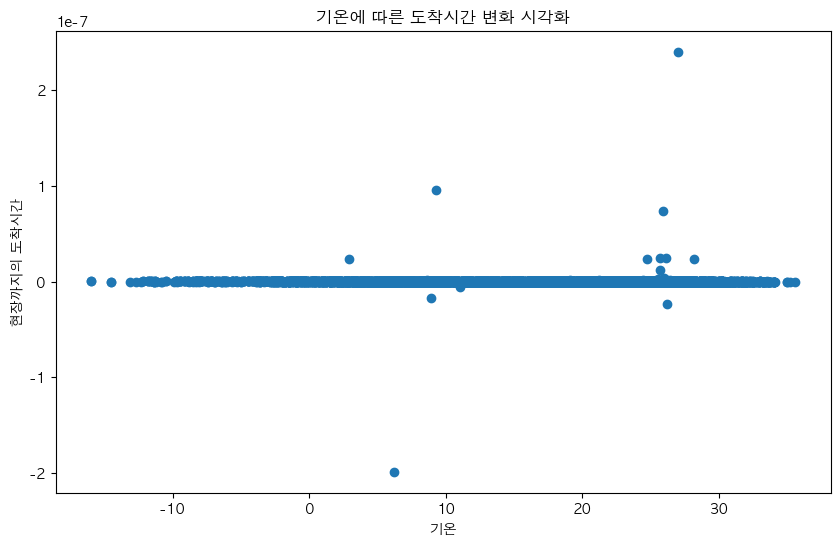

In [42]:
# 기온에 따른 도착시간 시각화
plt.figure(figsize=(10, 6))
x = data['time_unit_tmprt']
y = data['avrl_dpt'] / (10**9 * 60)
bar = plt.scatter(x,y)
#그래프 수치 표현
#for rect in bar:
 #   height = rect.get_height()
#    plt.text(rect.get_x()+rect.get_width()/2.0,height,  height, ha = 'center',va='bottom',size=12)

plt.title('기온에 따른 도착시간 변화 시각화')
plt.xlabel('기온')
plt.ylabel('현장까지의 도착시간')
plt.show()

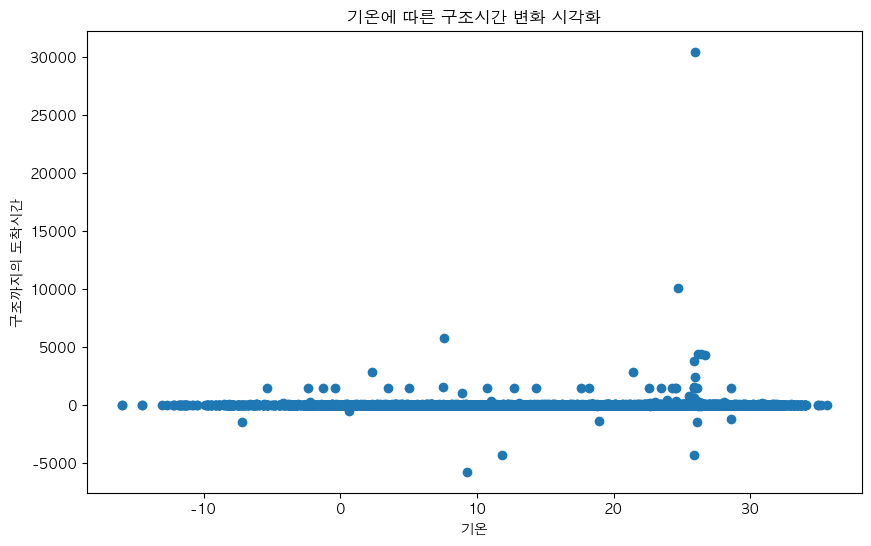

In [43]:
# 기온에 따른 구조완료시간 시각화
plt.figure(figsize=(10, 6))
x = data['time_unit_tmprt']
y = data['resc_avrl']
bar = plt.scatter(x,y)
#그래프 수치 표현
#for rect in bar:
#    height = rect.get_height()
#    plt.text(rect.get_x()+rect.get_width()/2.0,height,  height, ha = 'center',va='bottom',size=12)

plt.title('기온에 따른 구조시간 변화 시각화')
plt.xlabel('기온')
plt.ylabel('구조까지의 도착시간')
plt.show()

In [44]:
data

,msfrtn_resc_reprt_no,season_se_nm,daywk,dsp_ymd,dsp_tm,dsp_yr,dsp_mnth,dsp_day,dsp_hour,dsp_min,...,acdnt_cause_asort_nm,time_unit_tmprt,time_unit_rainqty,time_unit_ws,time_unit_wd,time_unit_humidity,time_unit_msnf,time_unit,avrl_dpt,resc_avrl
0,20231126307R00001,겨울,일요일,20230101.0,11100.0,2023.0,1.0,1.0,1.0,11.0,...,기타 수난,1.5,0.0,2.0,250.0,71.0,0.0,1104.0,0.0,0.0
1,20231113201R00001,겨울,일요일,20230101.0,12600.0,2023.0,1.0,1.0,1.0,26.0,...,기타 수난,1.5,0.0,2.0,250.0,71.0,0.0,1104.0,4.0,35.0
2,20231108201R00001,겨울,일요일,20230101.0,24400.0,2023.0,1.0,1.0,2.0,44.0,...,수색,1.5,0.0,2.0,250.0,72.0,0.0,925.0,6.0,8.0
3,20231106105R00001,겨울,일요일,20230101.0,65000.0,2023.0,1.0,1.0,6.0,50.0,...,수색,-0.2,0.0,3.0,320.0,67.0,0.0,962.0,6.0,13.0
4,20231126305R00001,겨울,일요일,20230101.0,65000.0,2023.0,1.0,1.0,6.0,50.0,...,기타 수난,-0.2,0.0,3.0,320.0,67.0,0.0,962.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6509,20221126304R00742,겨울,토요일,20221231.0,183600.0,2022.0,12.0,31.0,18.0,36.0,...,기타 수난,0.6,0.0,2.2,20.0,68.0,0.0,1286.0,4.0,6.0
6510,20221119108R01087,겨울,토요일,20221231.0,184700.0,2022.0,12.0,31.0,18.0,47.0,...,침수,0.6,0.0,2.2,20.0,68.0,0.0,1286.0,13.0,15.0
6511,20221108201R01819,겨울,토요일,20221231.0,232000.0,2022.0,12.0,31.0,23.0,20.0,...,수색,-0.2,0.0,1.3,230.0,77.0,0.0,1314.0,7.0,4.0
6512,20221113106R00702,겨울,토요일,20221231.0,232000.0,2022.0,12.0,31.0,23.0,20.0,...,기타 수난,-0.2,0.0,1.3,230.0,77.0,0.0,1314.0,7.0,4.0


In [45]:
# rainfall intensity
def classify_rainfall(rain_qty):
        if rain_qty == 0:
            return '비 안오는 날'
        elif rain_qty < 3:
            return '약한 비'
        elif rain_qty < 15:
            return '보통 비'
        elif rain_qty < 30:
            return '강한 비'
        else:
            return '매우 강한 비'
    

data['rain_intensity'] = data['time_unit_rainqty'].apply(classify_rainfall)

In [66]:
data


,msfrtn_resc_reprt_no,season_se_nm,daywk,dsp_ymd,dsp_tm,dsp_yr,dsp_mnth,dsp_day,dsp_hour,dsp_min,...,time_unit_tmprt,time_unit_rainqty,time_unit_ws,time_unit_wd,time_unit_humidity,time_unit_msnf,time_unit,avrl_dpt,resc_avrl,rain_intensity
112,20231119508R00015,겨울,금요일,20230113.0,63600.0,2023.0,1.0,13.0,6.0,36.0,...,6.8,6.5,5.0,50.0,100.0,0.0,368.0,8.0,26.0,보통 비
114,20231107103R00031,겨울,금요일,20230113.0,124400.0,2023.0,1.0,13.0,12.0,44.0,...,9.0,0.5,1.0,50.0,99.0,0.0,657.0,7.0,69.0,약한 비
133,20231126307R00013,겨울,토요일,20230114.0,30400.0,2023.0,1.0,14.0,3.0,4.0,...,7.8,0.1,2.0,270.0,100.0,0.0,29.0,3.0,14.0,약한 비
134,20231108102R00031,겨울,토요일,20230114.0,152100.0,2023.0,1.0,14.0,15.0,21.0,...,7.3,0.5,4.0,50.0,91.0,0.0,2000.0,5.0,7.0,약한 비
136,20231126306R00029,겨울,토요일,20230114.0,152100.0,2023.0,1.0,14.0,15.0,21.0,...,7.3,0.5,4.0,50.0,91.0,0.0,2000.0,4.0,3.0,약한 비
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6224,20221106201R01417,가을,화요일,20221129.0,1600.0,2022.0,11.0,29.0,0.0,16.0,...,15.0,9.5,1.6,200.0,97.0,0.0,226.0,4.0,15.0,보통 비
6226,20221108201R01636,가을,화요일,20221129.0,35300.0,2022.0,11.0,29.0,3.0,53.0,...,14.2,0.7,4.1,290.0,97.0,0.0,1196.0,4.0,9.0,약한 비
6227,20221126307R00544,가을,화요일,20221129.0,90700.0,2022.0,11.0,29.0,9.0,7.0,...,9.3,0.2,3.4,290.0,87.0,0.0,2000.0,4.0,4.0,약한 비
6367,20221126304R00720,겨울,월요일,20221212.0,211400.0,2022.0,12.0,12.0,21.0,14.0,...,2.6,2.5,0.8,290.0,92.0,0.0,661.0,4.0,5.0,약한 비


In [46]:
data[['time_unit_rainqty', 'rain_intensity']]

,time_unit_rainqty,rain_intensity
0,0.0,비 안오는 날
1,0.0,비 안오는 날
2,0.0,비 안오는 날
3,0.0,비 안오는 날
4,0.0,비 안오는 날
...,...,...
6509,0.0,비 안오는 날
6510,0.0,비 안오는 날
6511,0.0,비 안오는 날
6512,0.0,비 안오는 날


In [47]:
# 각 강수량 강도별 개수 세기
rain_intensity_counts = data['rain_intensity'].value_counts()

# 결과 출력
print(rain_intensity_counts)

rain_intensity
비 안오는 날    7969
약한 비        638
보통 비        262
강한 비         97
매우 강한 비      14
Name: count, dtype: int64


In [48]:
# '비 안오는 날'과 '비 오는 날' 구분
rainy_days_count = len(data[data['rain_intensity'] != '비 안오는 날'])
non_rainy_days_count = len(data[data['rain_intensity'] == '비 안오는 날'])

# 출력
print(f"비 오는 날: {rainy_days_count}건")
print(f"비 안오는 날: {non_rainy_days_count}건")

비 오는 날: 1011건
비 안오는 날: 7969건


In [49]:
# 비 오는 날 강도별 비율
rain_only_counts = data[data['rain_intensity'] != '비 안오는 날']['rain_intensity'].value_counts(normalize=True)
print(rain_only_counts)

rain_intensity
약한 비       0.631058
보통 비       0.259149
강한 비       0.095945
매우 강한 비    0.013848
Name: proportion, dtype: float64


In [50]:
data

,msfrtn_resc_reprt_no,season_se_nm,daywk,dsp_ymd,dsp_tm,dsp_yr,dsp_mnth,dsp_day,dsp_hour,dsp_min,...,time_unit_tmprt,time_unit_rainqty,time_unit_ws,time_unit_wd,time_unit_humidity,time_unit_msnf,time_unit,avrl_dpt,resc_avrl,rain_intensity
0,20231126307R00001,겨울,일요일,20230101.0,11100.0,2023.0,1.0,1.0,1.0,11.0,...,1.5,0.0,2.0,250.0,71.0,0.0,1104.0,0.0,0.0,비 안오는 날
1,20231113201R00001,겨울,일요일,20230101.0,12600.0,2023.0,1.0,1.0,1.0,26.0,...,1.5,0.0,2.0,250.0,71.0,0.0,1104.0,4.0,35.0,비 안오는 날
2,20231108201R00001,겨울,일요일,20230101.0,24400.0,2023.0,1.0,1.0,2.0,44.0,...,1.5,0.0,2.0,250.0,72.0,0.0,925.0,6.0,8.0,비 안오는 날
3,20231106105R00001,겨울,일요일,20230101.0,65000.0,2023.0,1.0,1.0,6.0,50.0,...,-0.2,0.0,3.0,320.0,67.0,0.0,962.0,6.0,13.0,비 안오는 날
4,20231126305R00001,겨울,일요일,20230101.0,65000.0,2023.0,1.0,1.0,6.0,50.0,...,-0.2,0.0,3.0,320.0,67.0,0.0,962.0,1.0,17.0,비 안오는 날
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6509,20221126304R00742,겨울,토요일,20221231.0,183600.0,2022.0,12.0,31.0,18.0,36.0,...,0.6,0.0,2.2,20.0,68.0,0.0,1286.0,4.0,6.0,비 안오는 날
6510,20221119108R01087,겨울,토요일,20221231.0,184700.0,2022.0,12.0,31.0,18.0,47.0,...,0.6,0.0,2.2,20.0,68.0,0.0,1286.0,13.0,15.0,비 안오는 날
6511,20221108201R01819,겨울,토요일,20221231.0,232000.0,2022.0,12.0,31.0,23.0,20.0,...,-0.2,0.0,1.3,230.0,77.0,0.0,1314.0,7.0,4.0,비 안오는 날
6512,20221113106R00702,겨울,토요일,20221231.0,232000.0,2022.0,12.0,31.0,23.0,20.0,...,-0.2,0.0,1.3,230.0,77.0,0.0,1314.0,7.0,4.0,비 안오는 날


In [51]:
data[data['rain_intensity'] == '비 안오는 날']

,msfrtn_resc_reprt_no,season_se_nm,daywk,dsp_ymd,dsp_tm,dsp_yr,dsp_mnth,dsp_day,dsp_hour,dsp_min,...,time_unit_tmprt,time_unit_rainqty,time_unit_ws,time_unit_wd,time_unit_humidity,time_unit_msnf,time_unit,avrl_dpt,resc_avrl,rain_intensity
0,20231126307R00001,겨울,일요일,20230101.0,11100.0,2023.0,1.0,1.0,1.0,11.0,...,1.5,0.0,2.0,250.0,71.0,0.0,1104.0,0.0,0.0,비 안오는 날
1,20231113201R00001,겨울,일요일,20230101.0,12600.0,2023.0,1.0,1.0,1.0,26.0,...,1.5,0.0,2.0,250.0,71.0,0.0,1104.0,4.0,35.0,비 안오는 날
2,20231108201R00001,겨울,일요일,20230101.0,24400.0,2023.0,1.0,1.0,2.0,44.0,...,1.5,0.0,2.0,250.0,72.0,0.0,925.0,6.0,8.0,비 안오는 날
3,20231106105R00001,겨울,일요일,20230101.0,65000.0,2023.0,1.0,1.0,6.0,50.0,...,-0.2,0.0,3.0,320.0,67.0,0.0,962.0,6.0,13.0,비 안오는 날
4,20231126305R00001,겨울,일요일,20230101.0,65000.0,2023.0,1.0,1.0,6.0,50.0,...,-0.2,0.0,3.0,320.0,67.0,0.0,962.0,1.0,17.0,비 안오는 날
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6509,20221126304R00742,겨울,토요일,20221231.0,183600.0,2022.0,12.0,31.0,18.0,36.0,...,0.6,0.0,2.2,20.0,68.0,0.0,1286.0,4.0,6.0,비 안오는 날
6510,20221119108R01087,겨울,토요일,20221231.0,184700.0,2022.0,12.0,31.0,18.0,47.0,...,0.6,0.0,2.2,20.0,68.0,0.0,1286.0,13.0,15.0,비 안오는 날
6511,20221108201R01819,겨울,토요일,20221231.0,232000.0,2022.0,12.0,31.0,23.0,20.0,...,-0.2,0.0,1.3,230.0,77.0,0.0,1314.0,7.0,4.0,비 안오는 날
6512,20221113106R00702,겨울,토요일,20221231.0,232000.0,2022.0,12.0,31.0,23.0,20.0,...,-0.2,0.0,1.3,230.0,77.0,0.0,1314.0,7.0,4.0,비 안오는 날


In [52]:
data[data['rain_intensity'] == '약한 비']

,msfrtn_resc_reprt_no,season_se_nm,daywk,dsp_ymd,dsp_tm,dsp_yr,dsp_mnth,dsp_day,dsp_hour,dsp_min,...,time_unit_tmprt,time_unit_rainqty,time_unit_ws,time_unit_wd,time_unit_humidity,time_unit_msnf,time_unit,avrl_dpt,resc_avrl,rain_intensity
114,20231107103R00031,겨울,금요일,20230113.0,124400.0,2023.0,1.0,13.0,12.0,44.0,...,9.0,0.5,1.0,50.0,99.0,0.0,657.0,7.0,69.0,약한 비
133,20231126307R00013,겨울,토요일,20230114.0,30400.0,2023.0,1.0,14.0,3.0,4.0,...,7.8,0.1,2.0,270.0,100.0,0.0,29.0,3.0,14.0,약한 비
134,20231108102R00031,겨울,토요일,20230114.0,152100.0,2023.0,1.0,14.0,15.0,21.0,...,7.3,0.5,4.0,50.0,91.0,0.0,2000.0,5.0,7.0,약한 비
136,20231126306R00029,겨울,토요일,20230114.0,152100.0,2023.0,1.0,14.0,15.0,21.0,...,7.3,0.5,4.0,50.0,91.0,0.0,2000.0,4.0,3.0,약한 비
143,20231108201R00074,겨울,일요일,20230115.0,63100.0,2023.0,1.0,15.0,6.0,31.0,...,2.6,1.1,2.0,50.0,98.0,0.0,380.0,9.0,20.0,약한 비
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6220,20221126305R00780,가을,월요일,20221128.0,180100.0,2022.0,11.0,28.0,18.0,1.0,...,13.4,2.0,2.8,50.0,90.0,0.0,362.0,3.0,18.0,약한 비
6226,20221108201R01636,가을,화요일,20221129.0,35300.0,2022.0,11.0,29.0,3.0,53.0,...,14.2,0.7,4.1,290.0,97.0,0.0,1196.0,4.0,9.0,약한 비
6227,20221126307R00544,가을,화요일,20221129.0,90700.0,2022.0,11.0,29.0,9.0,7.0,...,9.3,0.2,3.4,290.0,87.0,0.0,2000.0,4.0,4.0,약한 비
6367,20221126304R00720,겨울,월요일,20221212.0,211400.0,2022.0,12.0,12.0,21.0,14.0,...,2.6,2.5,0.8,290.0,92.0,0.0,661.0,4.0,5.0,약한 비


In [53]:
data[data['rain_intensity'] == '보통 비']

,msfrtn_resc_reprt_no,season_se_nm,daywk,dsp_ymd,dsp_tm,dsp_yr,dsp_mnth,dsp_day,dsp_hour,dsp_min,...,time_unit_tmprt,time_unit_rainqty,time_unit_ws,time_unit_wd,time_unit_humidity,time_unit_msnf,time_unit,avrl_dpt,resc_avrl,rain_intensity
112,20231119508R00015,겨울,금요일,20230113.0,63600.0,2023.0,1.0,13.0,6.0,36.0,...,6.8,6.5,5.0,50.0,100.0,0.0,368.0,8.0,26.0,보통 비
730,20231114402R00346,봄,목요일,20230309.0,33900.0,2023.0,3.0,9.0,3.0,39.0,...,11.6,3.6,2.0,360.0,83.0,0.0,1235.0,7.0,0.0,보통 비
731,20231118201R00319,봄,목요일,20230309.0,33900.0,2023.0,3.0,9.0,3.0,39.0,...,11.6,3.6,2.0,360.0,83.0,0.0,1235.0,7.0,4.0,보통 비
732,20231120104R00290,봄,목요일,20230309.0,33900.0,2023.0,3.0,9.0,3.0,39.0,...,11.6,3.6,2.0,360.0,83.0,0.0,1235.0,7.0,0.0,보통 비
733,20231126304R00080,봄,목요일,20230309.0,33900.0,2023.0,3.0,9.0,3.0,39.0,...,11.6,3.6,2.0,360.0,83.0,0.0,1235.0,7.0,4.0,보통 비
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5516,20221106201R01176,가을,일요일,20221002.0,230900.0,2022.0,10.0,2.0,23.0,9.0,...,17.3,3.3,2.9,70.0,97.0,0.0,425.0,5.0,11.0,보통 비
5529,20221112105R01058,가을,월요일,20221003.0,223500.0,2022.0,10.0,3.0,22.0,35.0,...,23.1,5.6,4.6,200.0,96.0,0.0,978.0,5.0,15.0,보통 비
5530,20221112105R01059,가을,화요일,20221004.0,10900.0,2022.0,10.0,4.0,1.0,9.0,...,22.4,6.1,5.7,270.0,99.0,0.0,294.0,11.0,40.0,보통 비
5531,20221108105R00218,가을,화요일,20221004.0,15000.0,2022.0,10.0,4.0,1.0,50.0,...,22.4,6.1,5.7,270.0,99.0,0.0,294.0,5.0,15.0,보통 비


In [54]:
data[data['rain_intensity'] == '강한 비']

,msfrtn_resc_reprt_no,season_se_nm,daywk,dsp_ymd,dsp_tm,dsp_yr,dsp_mnth,dsp_day,dsp_hour,dsp_min,...,time_unit_tmprt,time_unit_rainqty,time_unit_ws,time_unit_wd,time_unit_humidity,time_unit_msnf,time_unit,avrl_dpt,resc_avrl,rain_intensity
2225,20231111104R00243,여름,금요일,20230714.0,20100.0,2023.0,7.0,14.0,2.0,1.0,...,24.1,15.3,1.0,90.0,98.0,0.0,220.0,0.0,0.0,강한 비
2226,20231126304R00357,여름,금요일,20230714.0,20700.0,2023.0,7.0,14.0,2.0,7.0,...,24.0,17.7,1.0,50.0,99.0,0.0,131.0,0.0,0.0,강한 비
2519,20231112508R00298,여름,일요일,20230730.0,190200.0,2023.0,7.0,30.0,19.0,2.0,...,25.6,20.0,4.0,270.0,91.0,0.0,91.0,0.0,0.0,강한 비
2520,20231112107R00179,여름,일요일,20230730.0,190300.0,2023.0,7.0,30.0,19.0,3.0,...,25.6,20.0,4.0,270.0,91.0,0.0,91.0,0.0,0.0,강한 비
2521,20231113106R00760,여름,일요일,20230730.0,190300.0,2023.0,7.0,30.0,19.0,3.0,...,25.6,20.0,4.0,270.0,91.0,0.0,91.0,0.0,0.0,강한 비
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,20221113104R00918,가을,일요일,20221113.0,3600.0,2022.0,11.0,13.0,0.0,36.0,...,17.3,19.4,2.8,230.0,97.0,0.0,1231.0,6.0,0.0,강한 비
6008,20221113201R01487,가을,일요일,20221113.0,3600.0,2022.0,11.0,13.0,0.0,36.0,...,17.3,19.4,2.8,230.0,97.0,0.0,1231.0,7.0,0.0,강한 비
6009,20221126306R01252,가을,일요일,20221113.0,3600.0,2022.0,11.0,13.0,0.0,36.0,...,17.3,19.4,2.8,230.0,97.0,0.0,1231.0,6.0,5.0,강한 비
6010,20221113201R01486,가을,일요일,20221113.0,5700.0,2022.0,11.0,13.0,0.0,57.0,...,17.3,19.4,2.8,230.0,97.0,0.0,1231.0,6.0,1.0,강한 비


In [55]:
data[data['rain_intensity'] == '매우 강한 비']

,msfrtn_resc_reprt_no,season_se_nm,daywk,dsp_ymd,dsp_tm,dsp_yr,dsp_mnth,dsp_day,dsp_hour,dsp_min,...,time_unit_tmprt,time_unit_rainqty,time_unit_ws,time_unit_wd,time_unit_humidity,time_unit_msnf,time_unit,avrl_dpt,resc_avrl,rain_intensity
2877,20221114104R00841,여름,목요일,20220623.0,190300.0,2022.0,6.0,23.0,19.0,3.0,...,24.0,31.4,3.4,230.0,100.0,0.0,82.0,0.0,0.0,매우 강한 비
2878,20221114103R00746,여름,목요일,20220623.0,190700.0,2022.0,6.0,23.0,19.0,7.0,...,24.0,31.4,3.4,230.0,100.0,0.0,82.0,0.0,0.0,매우 강한 비
2879,20221113105R00271,여름,목요일,20220623.0,191300.0,2022.0,6.0,23.0,19.0,13.0,...,24.0,31.4,3.4,230.0,100.0,0.0,82.0,0.0,0.0,매우 강한 비
2880,20221110509R00447,여름,목요일,20220623.0,191600.0,2022.0,6.0,23.0,19.0,16.0,...,24.0,31.4,3.4,230.0,100.0,0.0,82.0,0.0,0.0,매우 강한 비
2881,20221119108R00452,여름,목요일,20220623.0,192000.0,2022.0,6.0,23.0,19.0,20.0,...,24.0,31.4,3.4,230.0,100.0,0.0,82.0,0.0,0.0,매우 강한 비
2882,20221116401R00222,여름,목요일,20220623.0,193900.0,2022.0,6.0,23.0,19.0,39.0,...,24.0,31.4,3.4,230.0,100.0,0.0,82.0,0.0,0.0,매우 강한 비
2883,20221110509R00448,여름,목요일,20220623.0,194200.0,2022.0,6.0,23.0,19.0,42.0,...,24.0,31.4,3.4,230.0,100.0,0.0,82.0,0.0,0.0,매우 강한 비
2884,20221114104R00842,여름,목요일,20220623.0,194500.0,2022.0,6.0,23.0,19.0,45.0,...,24.0,31.4,3.4,230.0,100.0,0.0,82.0,0.0,0.0,매우 강한 비
2885,20221125505R00345,여름,목요일,20220623.0,194900.0,2022.0,6.0,23.0,19.0,49.0,...,24.0,31.4,3.4,230.0,100.0,0.0,82.0,0.0,0.0,매우 강한 비
2886,20221119108R00453,여름,목요일,20220623.0,195000.0,2022.0,6.0,23.0,19.0,50.0,...,24.0,31.4,3.4,230.0,100.0,0.0,82.0,0.0,0.0,매우 강한 비


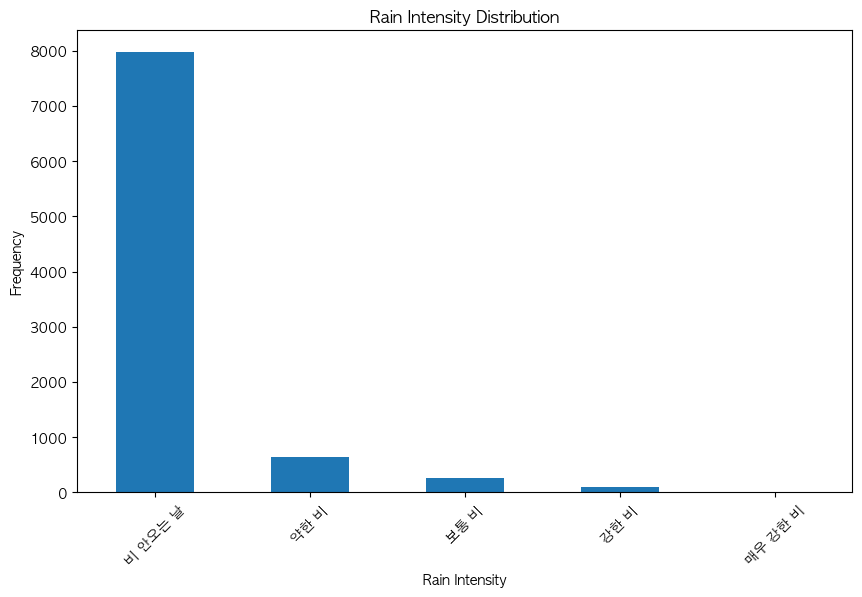

In [56]:
# 막대 그래프로 시각화
rain_intensity_counts.plot(kind='bar', figsize=(10, 6), title='Rain Intensity Distribution')
plt.xlabel('Rain Intensity')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

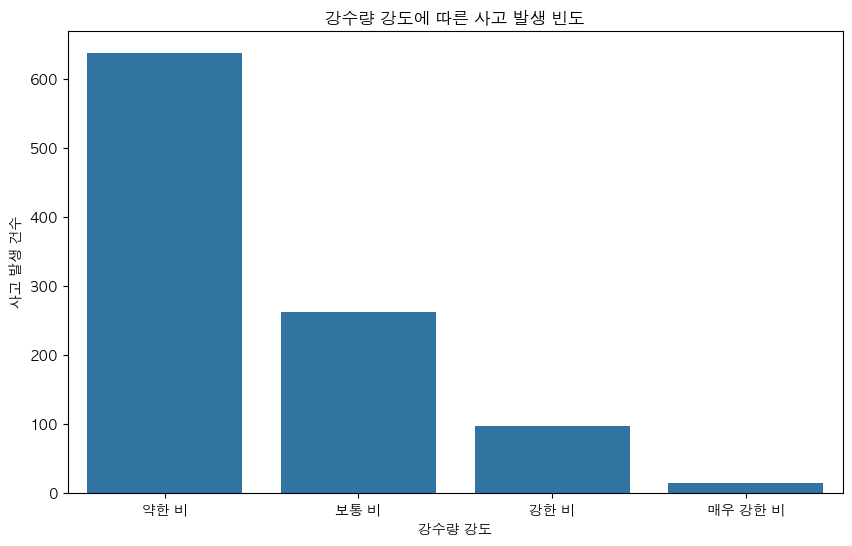

In [57]:
# 비 오는 날 데이터 필터링
rainy_data = data[data['rain_intensity'] != '비 안오는 날']

# 강수량 강도 분석 시각화
plt.figure(figsize=(10, 6))
sns.countplot(data=rainy_data, x='rain_intensity', order=['약한 비', '보통 비', '강한 비', '매우 강한 비'])
plt.title('강수량 강도에 따른 사고 발생 빈도')
plt.xlabel('강수량 강도')
plt.ylabel('사고 발생 건수')
plt.show()

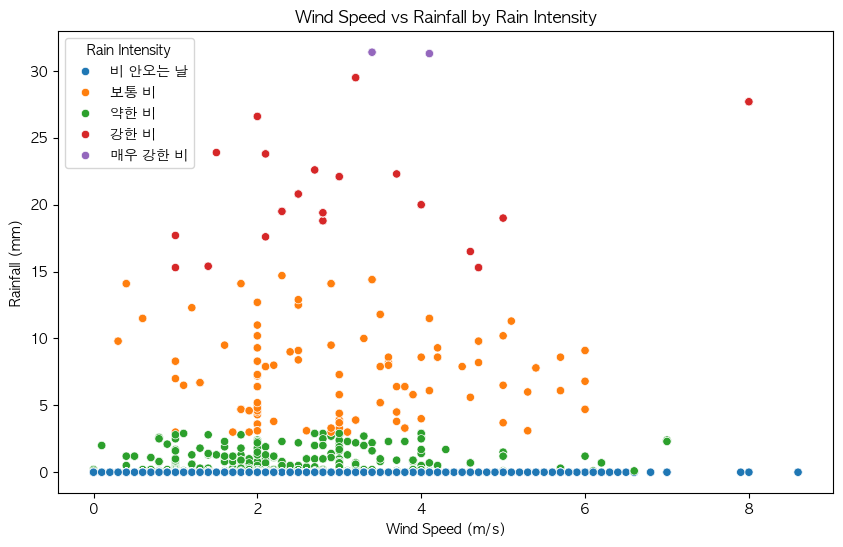

In [58]:
# 풍속과 강수량의 관계. 
# 풍속이 증가함에 따라 강수량이 변하는 경향이 있는지 확인.
# 특정 강수량 강도(예: '매우 강한 비')에서 풍속의 분포가 더 높은지 확인.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='time_unit_ws', y='time_unit_rainqty', hue='rain_intensity')
plt.title('Wind Speed vs Rainfall by Rain Intensity')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Rainfall (mm)')
plt.legend(title='Rain Intensity')
plt.show()

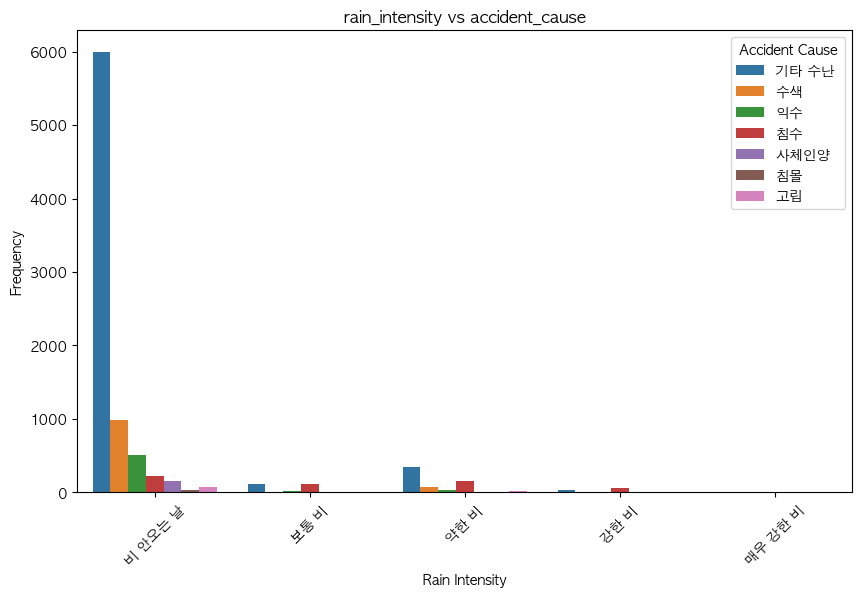

In [59]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='rain_intensity', hue='acdnt_cause_asort_nm')
plt.title('rain_intensity vs accident_cause')
plt.xlabel('Rain Intensity')
plt.ylabel('Frequency')
plt.legend(title='Accident Cause')
plt.xticks(rotation=45)
plt.show()

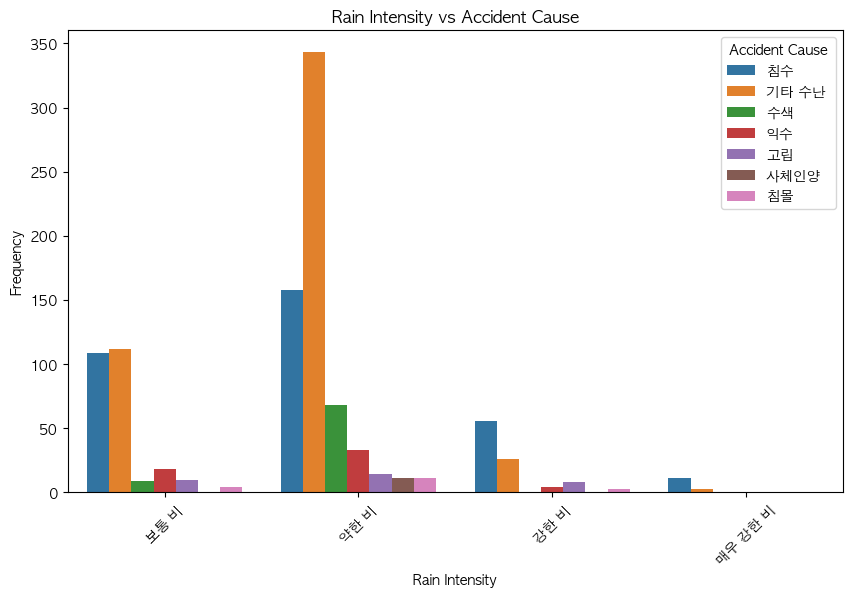

In [60]:
# '비 안오는 날' 데이터 제외
rainy_data = data[data['rain_intensity'] != '비 안오는 날']

# 시각화
plt.figure(figsize=(10, 6))
sns.countplot(data=rainy_data, x='rain_intensity', hue='acdnt_cause_asort_nm')
plt.title('Rain Intensity vs Accident Cause')
plt.xlabel('Rain Intensity')
plt.ylabel('Frequency')
plt.legend(title='Accident Cause')
plt.xticks(rotation=45)
plt.show()

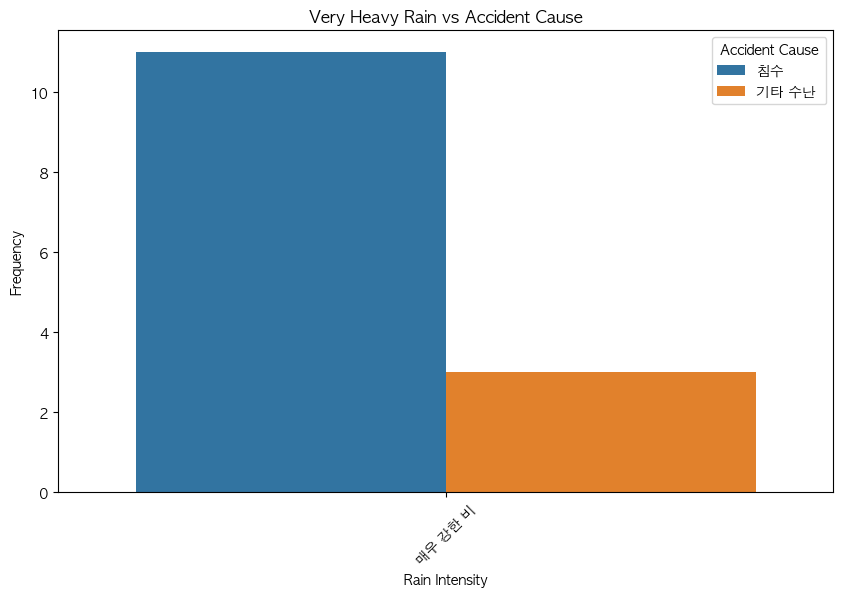

In [61]:
# '매우 강한 비' 데이터만 필터링
very_heavy_rain_data = rainy_data[rainy_data['rain_intensity'] == '매우 강한 비']

# 시각화
plt.figure(figsize=(10, 6))
sns.countplot(data=very_heavy_rain_data, x='rain_intensity', hue='acdnt_cause_asort_nm')
plt.title('Very Heavy Rain vs Accident Cause')
plt.xlabel('Rain Intensity')
plt.ylabel('Frequency')
plt.legend(title='Accident Cause')
plt.xticks(rotation=45)
plt.show()


In [62]:

# 비가 오는 날만 포함하는 값
rainy_days = ['약한 비', '보통 비', '강한 비', '매우 강한 비']

data = data[data['rain_intensity'].isin(rainy_days)]


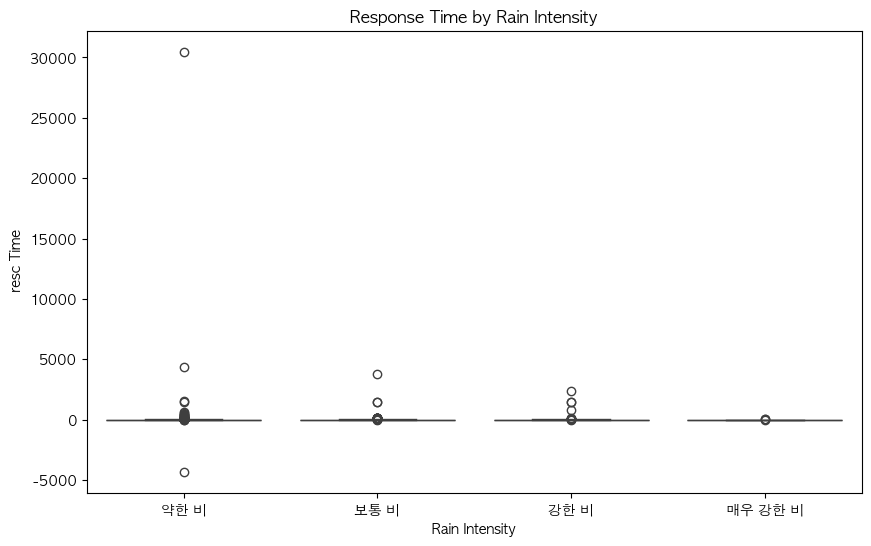

In [63]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='rain_intensity', y='resc_avrl', order=['약한 비', '보통 비', '강한 비', '매우 강한 비'])
plt.title('Response Time by Rain Intensity')
plt.xlabel('Rain Intensity')
plt.ylabel(' resc Time')
plt.show()

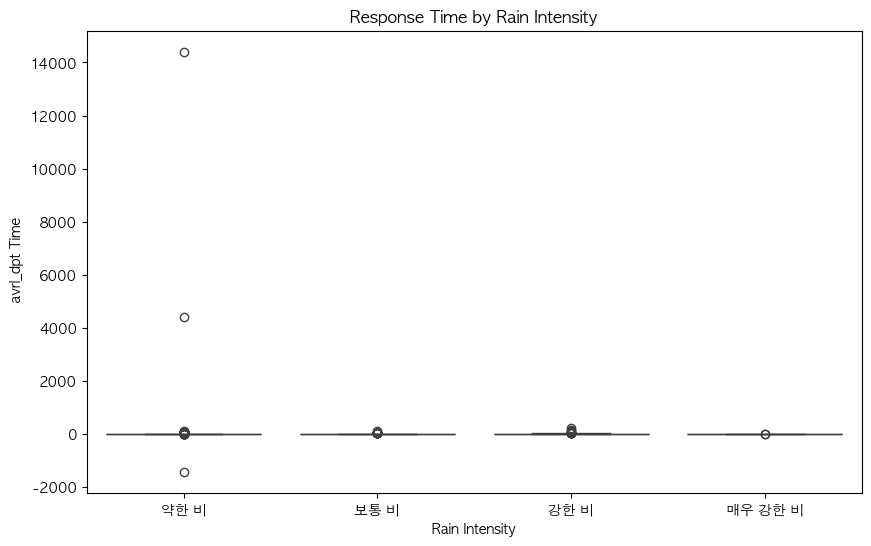

In [64]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='rain_intensity', y='avrl_dpt', order=['약한 비', '보통 비', '강한 비', '매우 강한 비'])
plt.title('Response Time by Rain Intensity')
plt.xlabel('Rain Intensity')
plt.ylabel(' avrl_dpt Time')
plt.show()